In [2]:
# pakage import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas import DataFrame, Series
from matplotlib import cm
from matplotlib import font_manager,rc
rc('font', family='AppleGothic')

In [3]:
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)

In [4]:
df = pd.read_csv('Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum() # null 값 확인

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# 필요없는 변수 제거
# Over18, EmployeeCount,EmployeeNumber,StandardHours

df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [8]:
# object 변수

object_col = []
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
print(object_col)
print(len(object_col))

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
8


In [9]:
# int 변수

int_col = []
for i in df.columns:
    if df[i].dtype=='int64':
        int_col.append(i)
print(int_col)
print(len(int_col))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
23


In [10]:
#df.describe() # int형 변수

# employeecount,employeenumber,standardhours : 제외

#int_col.remove('EmployeeCount')
#int_col.remove('EmployeeNumber')
#int_col.remove('StandardHours')
#print(int_col)
#print(len(int_col))
# 사실상 카테고리 변수   ---> 어떻게 처리?  --> map 써서 카테고리형으로?
# education, employeenumber, environmentsatisfaction, jobinvolvement, joblevel, jobsatisfaction, preformancerating, relationshipsatisfaction, worklifebalance

In [11]:
#df.drop('Over18',inplace=True,axis=1)
# over18 : 제외
#object_col.remove('Over18')

#print(object_col)
#print(len(object_col))

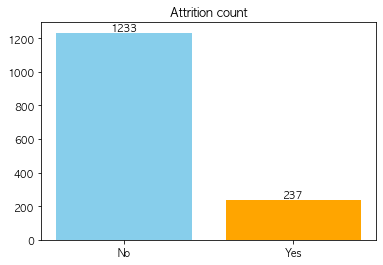

In [12]:
# Attrition count

plt.bar(df['Attrition'].value_counts().index,df['Attrition'].value_counts(),
       color=('skyblue','orange'))
for i, v in enumerate(df['Attrition'].value_counts().index):
    plt.text(v,df['Attrition'].value_counts()[i],df['Attrition'].value_counts()[i],
             fontsize = 10,
             color = 'black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.title('Attrition count')
plt.show()

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

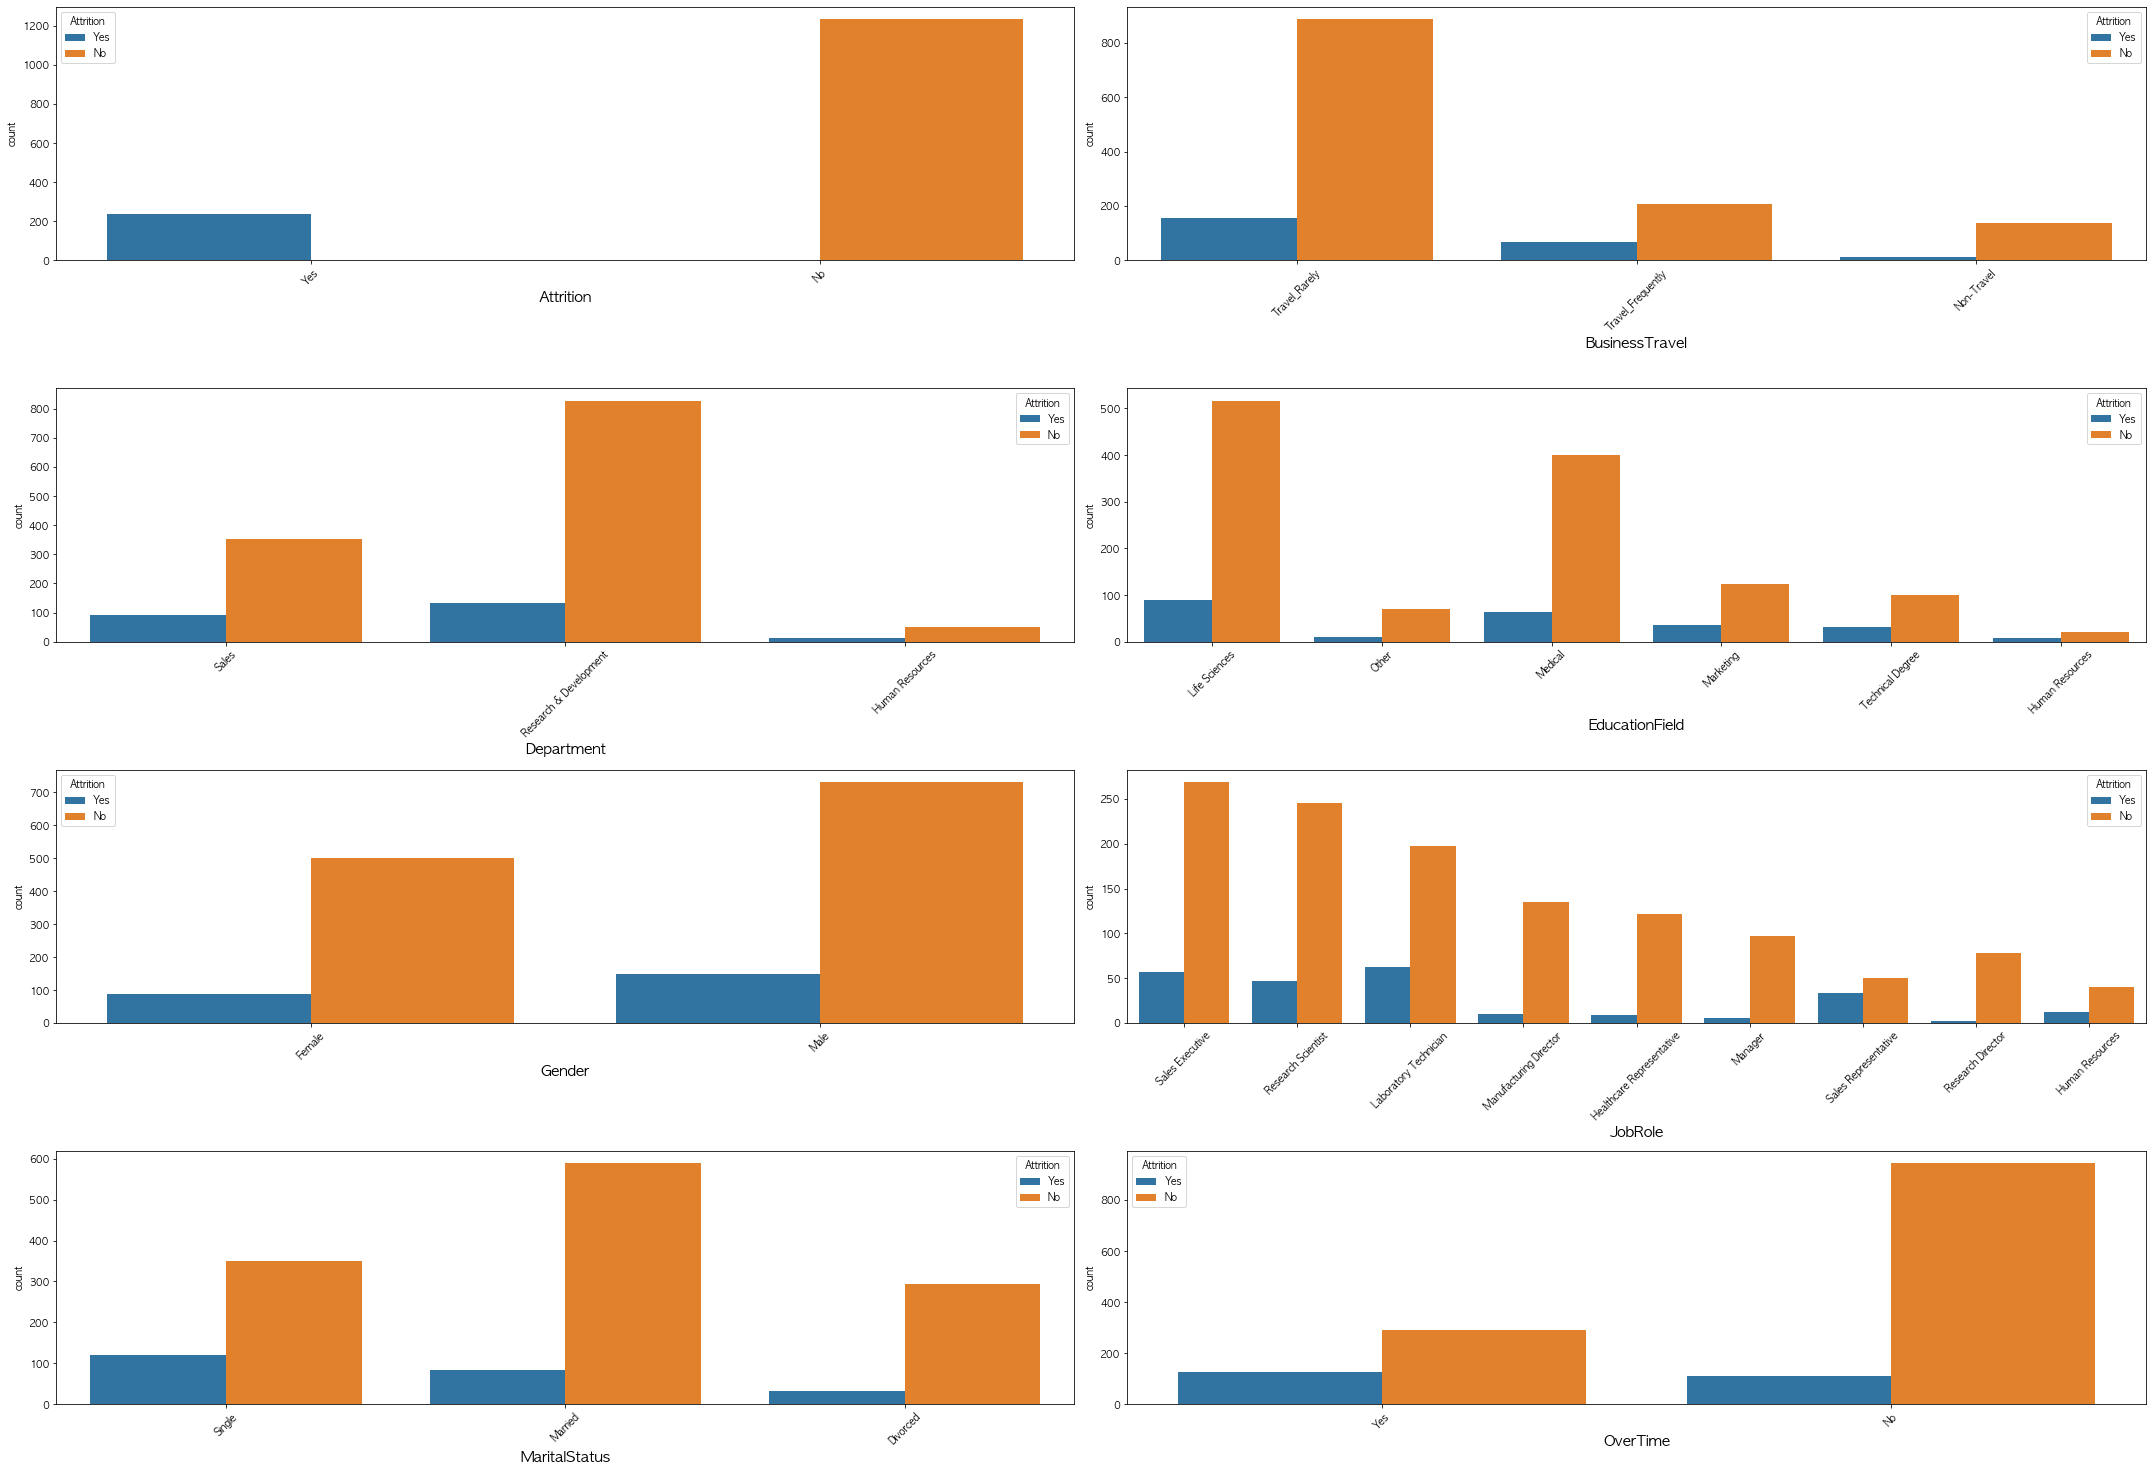

In [13]:
# 카테고리 변수 - 퇴직 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(object_col)):

    plt.subplot(5,2,l)
    sns.countplot(object_col[i],hue='Attrition',data=df)
    plt.xticks(rotation=45)
    plt.xlabel(object_col[i],fontsize=15)
    if l > 8:
        break
    l += 1
fig.tight_layout()
plt.show()

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


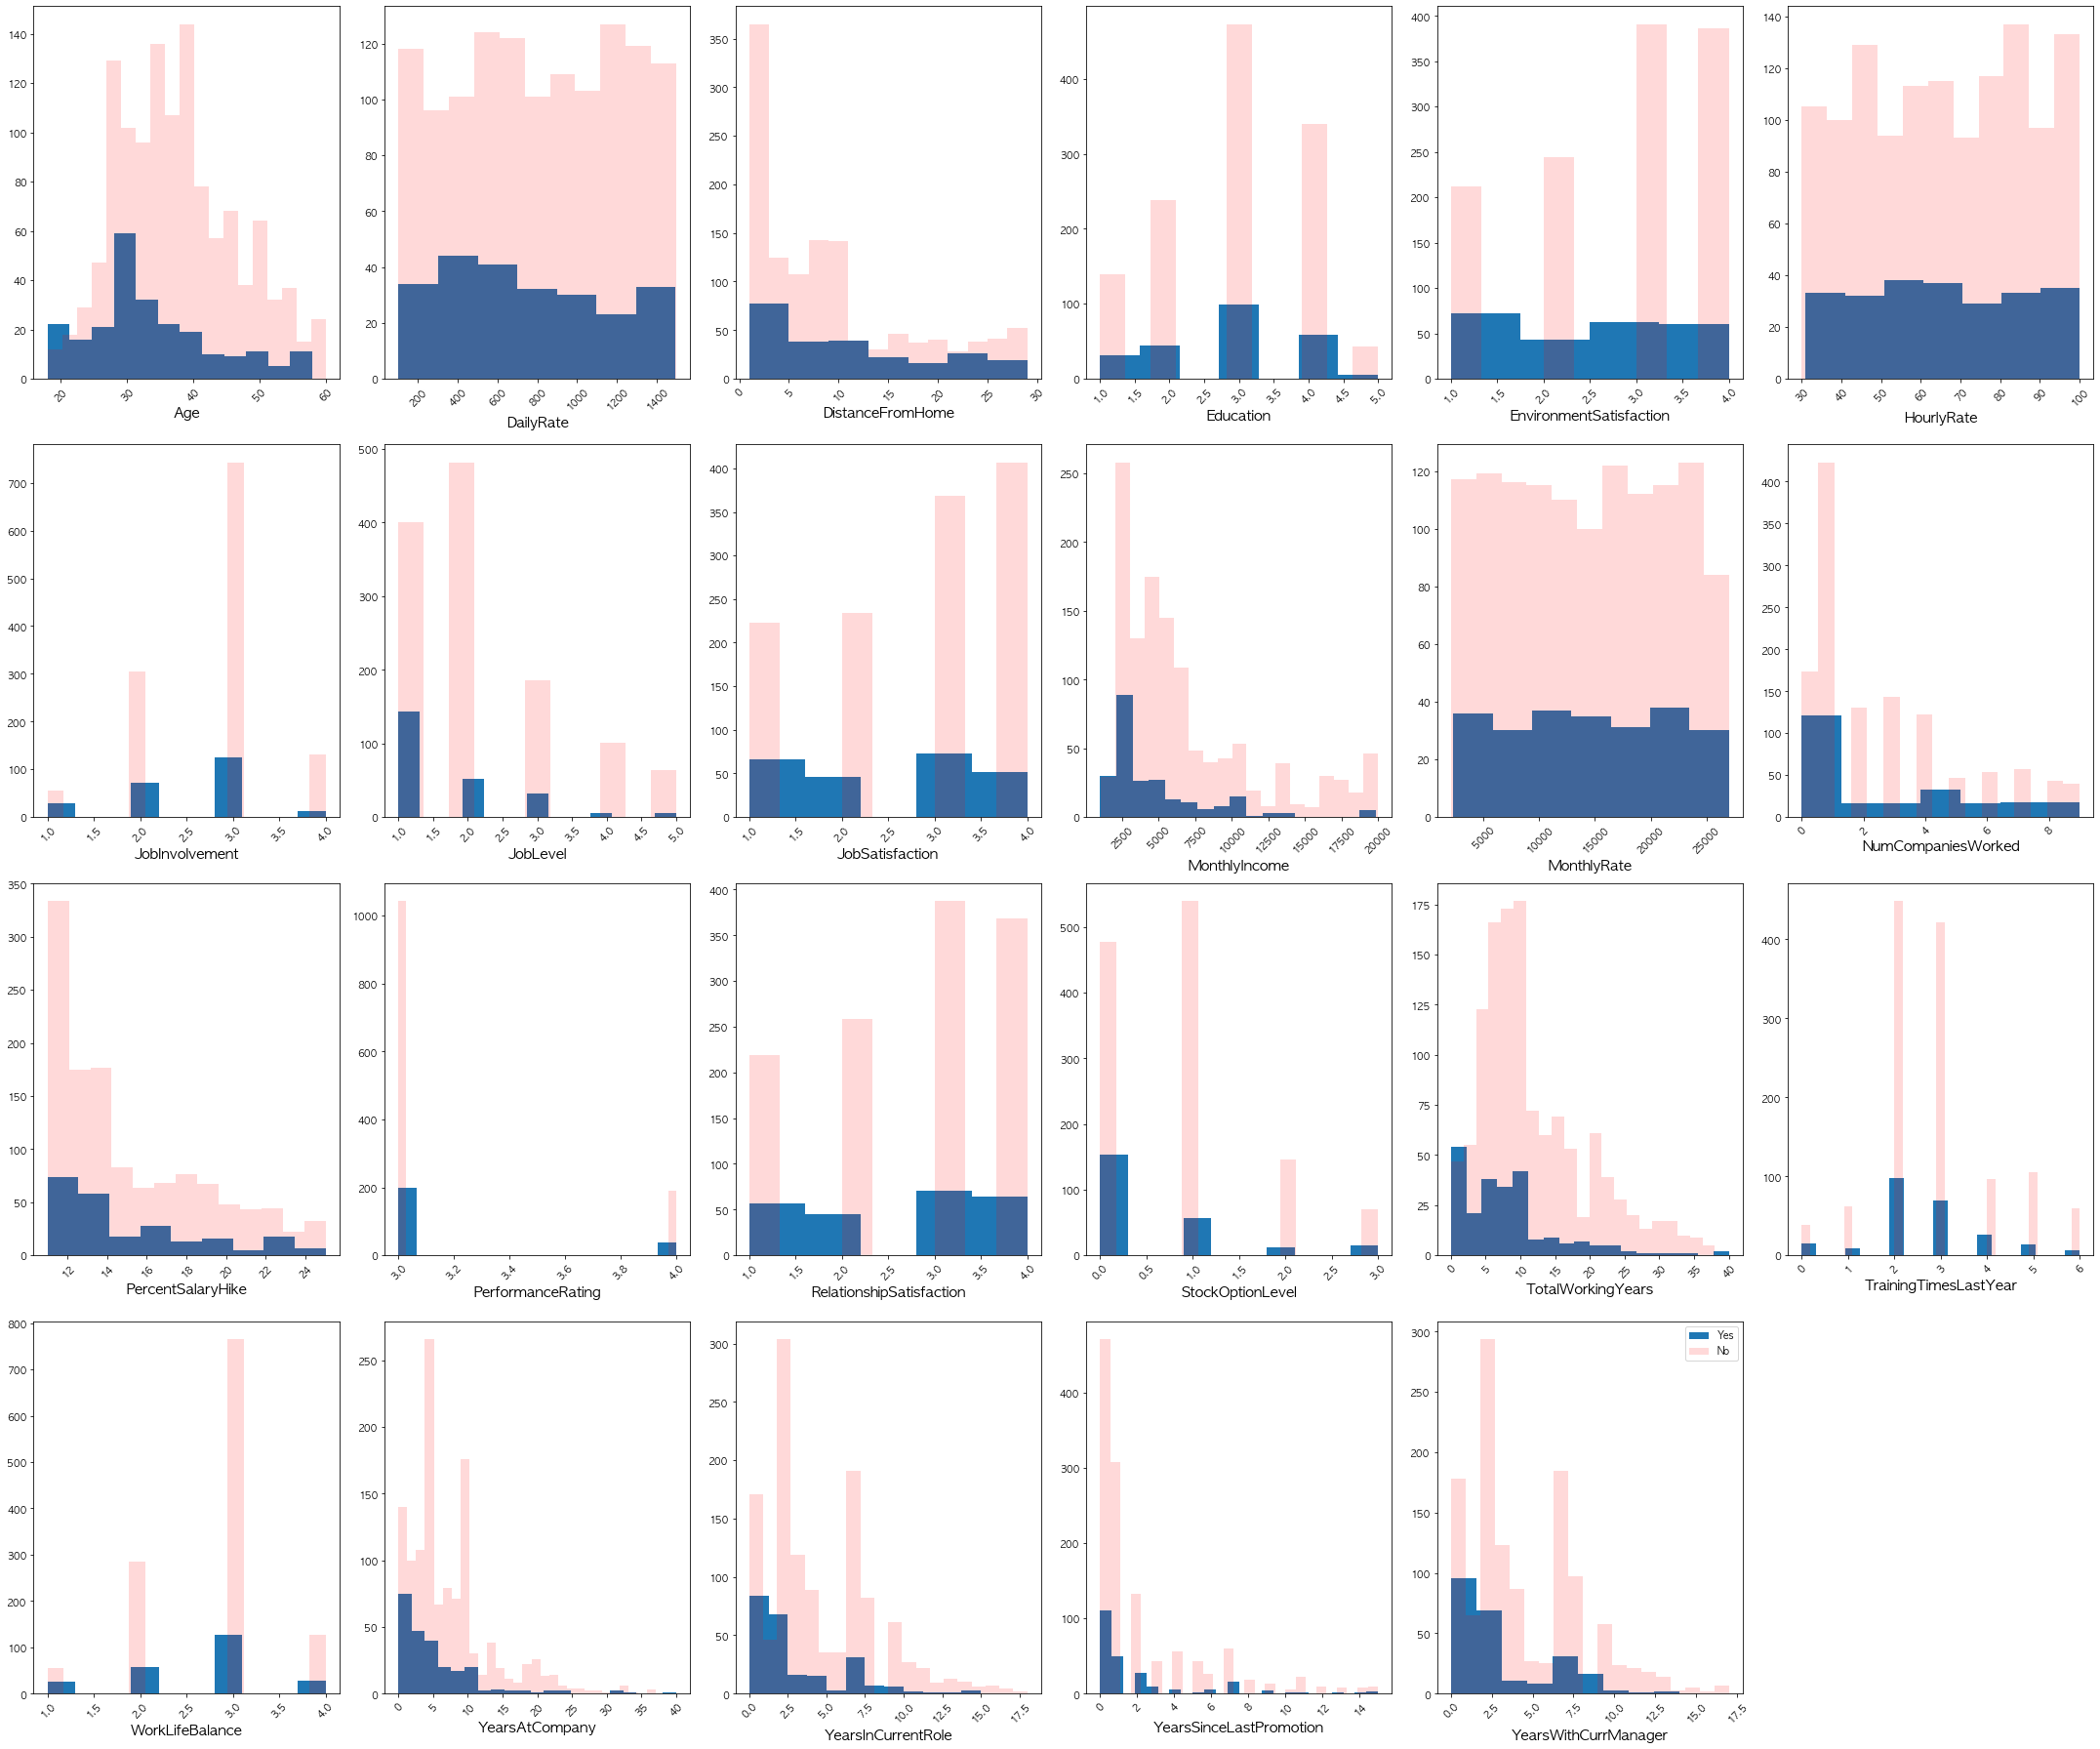

In [14]:
# int 변수 - 퇴사 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,6,l)
    sns.distplot(df[df['Attrition']=='Yes'][int_col[i]],kde=False,hist_kws=({'alpha':1}),label='Yes')
    sns.distplot(df[df['Attrition']=='No'][int_col[i]],kde=False,hist_kws=({'color':'red','alpha':0.15}),label='No')
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 23:
        break
    l += 1
fig.tight_layout()
plt.legend()
plt.show()

In [15]:
# int 변수 -> object 변수

df['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'},inplace=True)
df['EnvironmentSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['JobInvolvement'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['JobSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['PerformanceRating'].replace({1:'Low',2:'Good',3:'Excellent',4:'Outstanding'},inplace=True)
df['RelationshipSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'},inplace=True)
df['WorkLifeBalance'].replace({1:'Bad',2:'Good',3:'Better',4:'Best'},inplace=True)

# object 변수로 변환했기 때문에 object_col,int_col 다시 만들고 그래프도 다시 그린다

In [16]:
# object 변수

object_col = []
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
print(object_col)
print(len(object_col))

# int 변수

int_col = []
for i in df.columns:
    if df[i].dtype=='int64':
        int_col.append(i)
print(int_col)
print(len(int_col))

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
15
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
16


/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

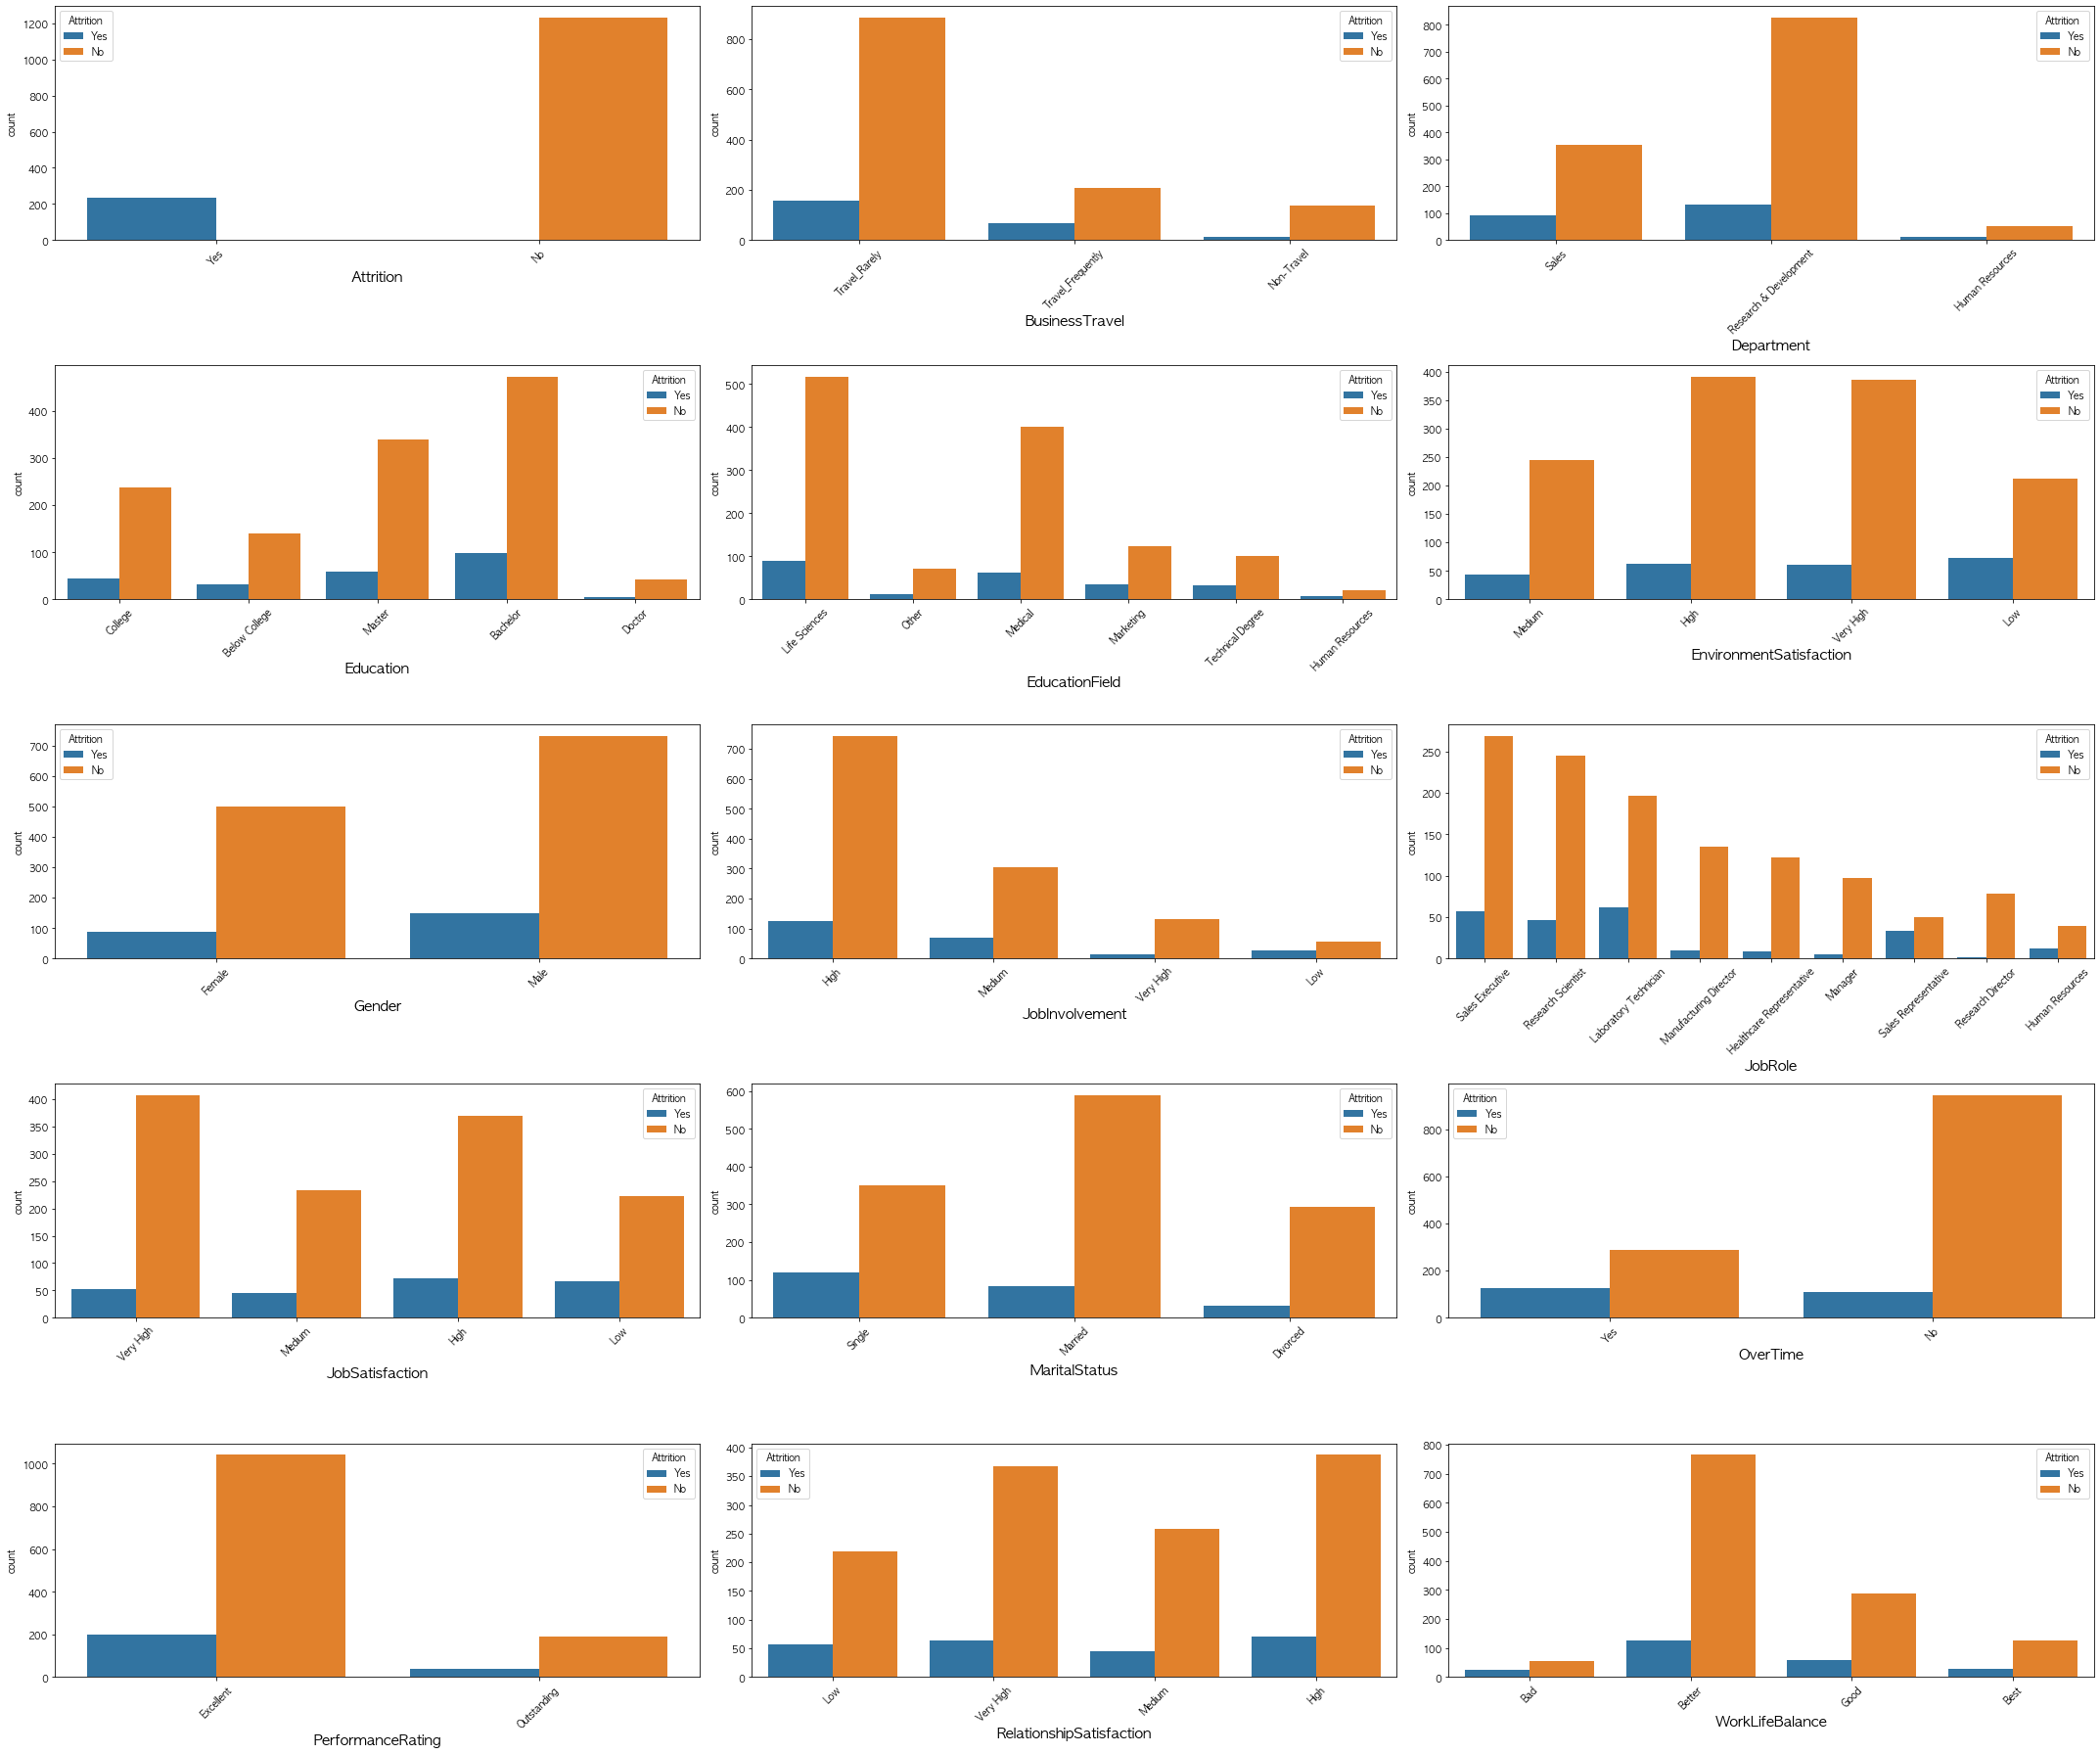

In [17]:
# 카테고리 변수 - 퇴직 여부

fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(object_col)):

    plt.subplot(5,3,l)
    sns.countplot(object_col[i],hue='Attrition',data=df)
    plt.xticks(rotation=45)
    plt.xlabel(object_col[i],fontsize=15)
    if l > 15:
        break
    l += 1
fig.tight_layout()
plt.show()

/Users/keyonbit/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


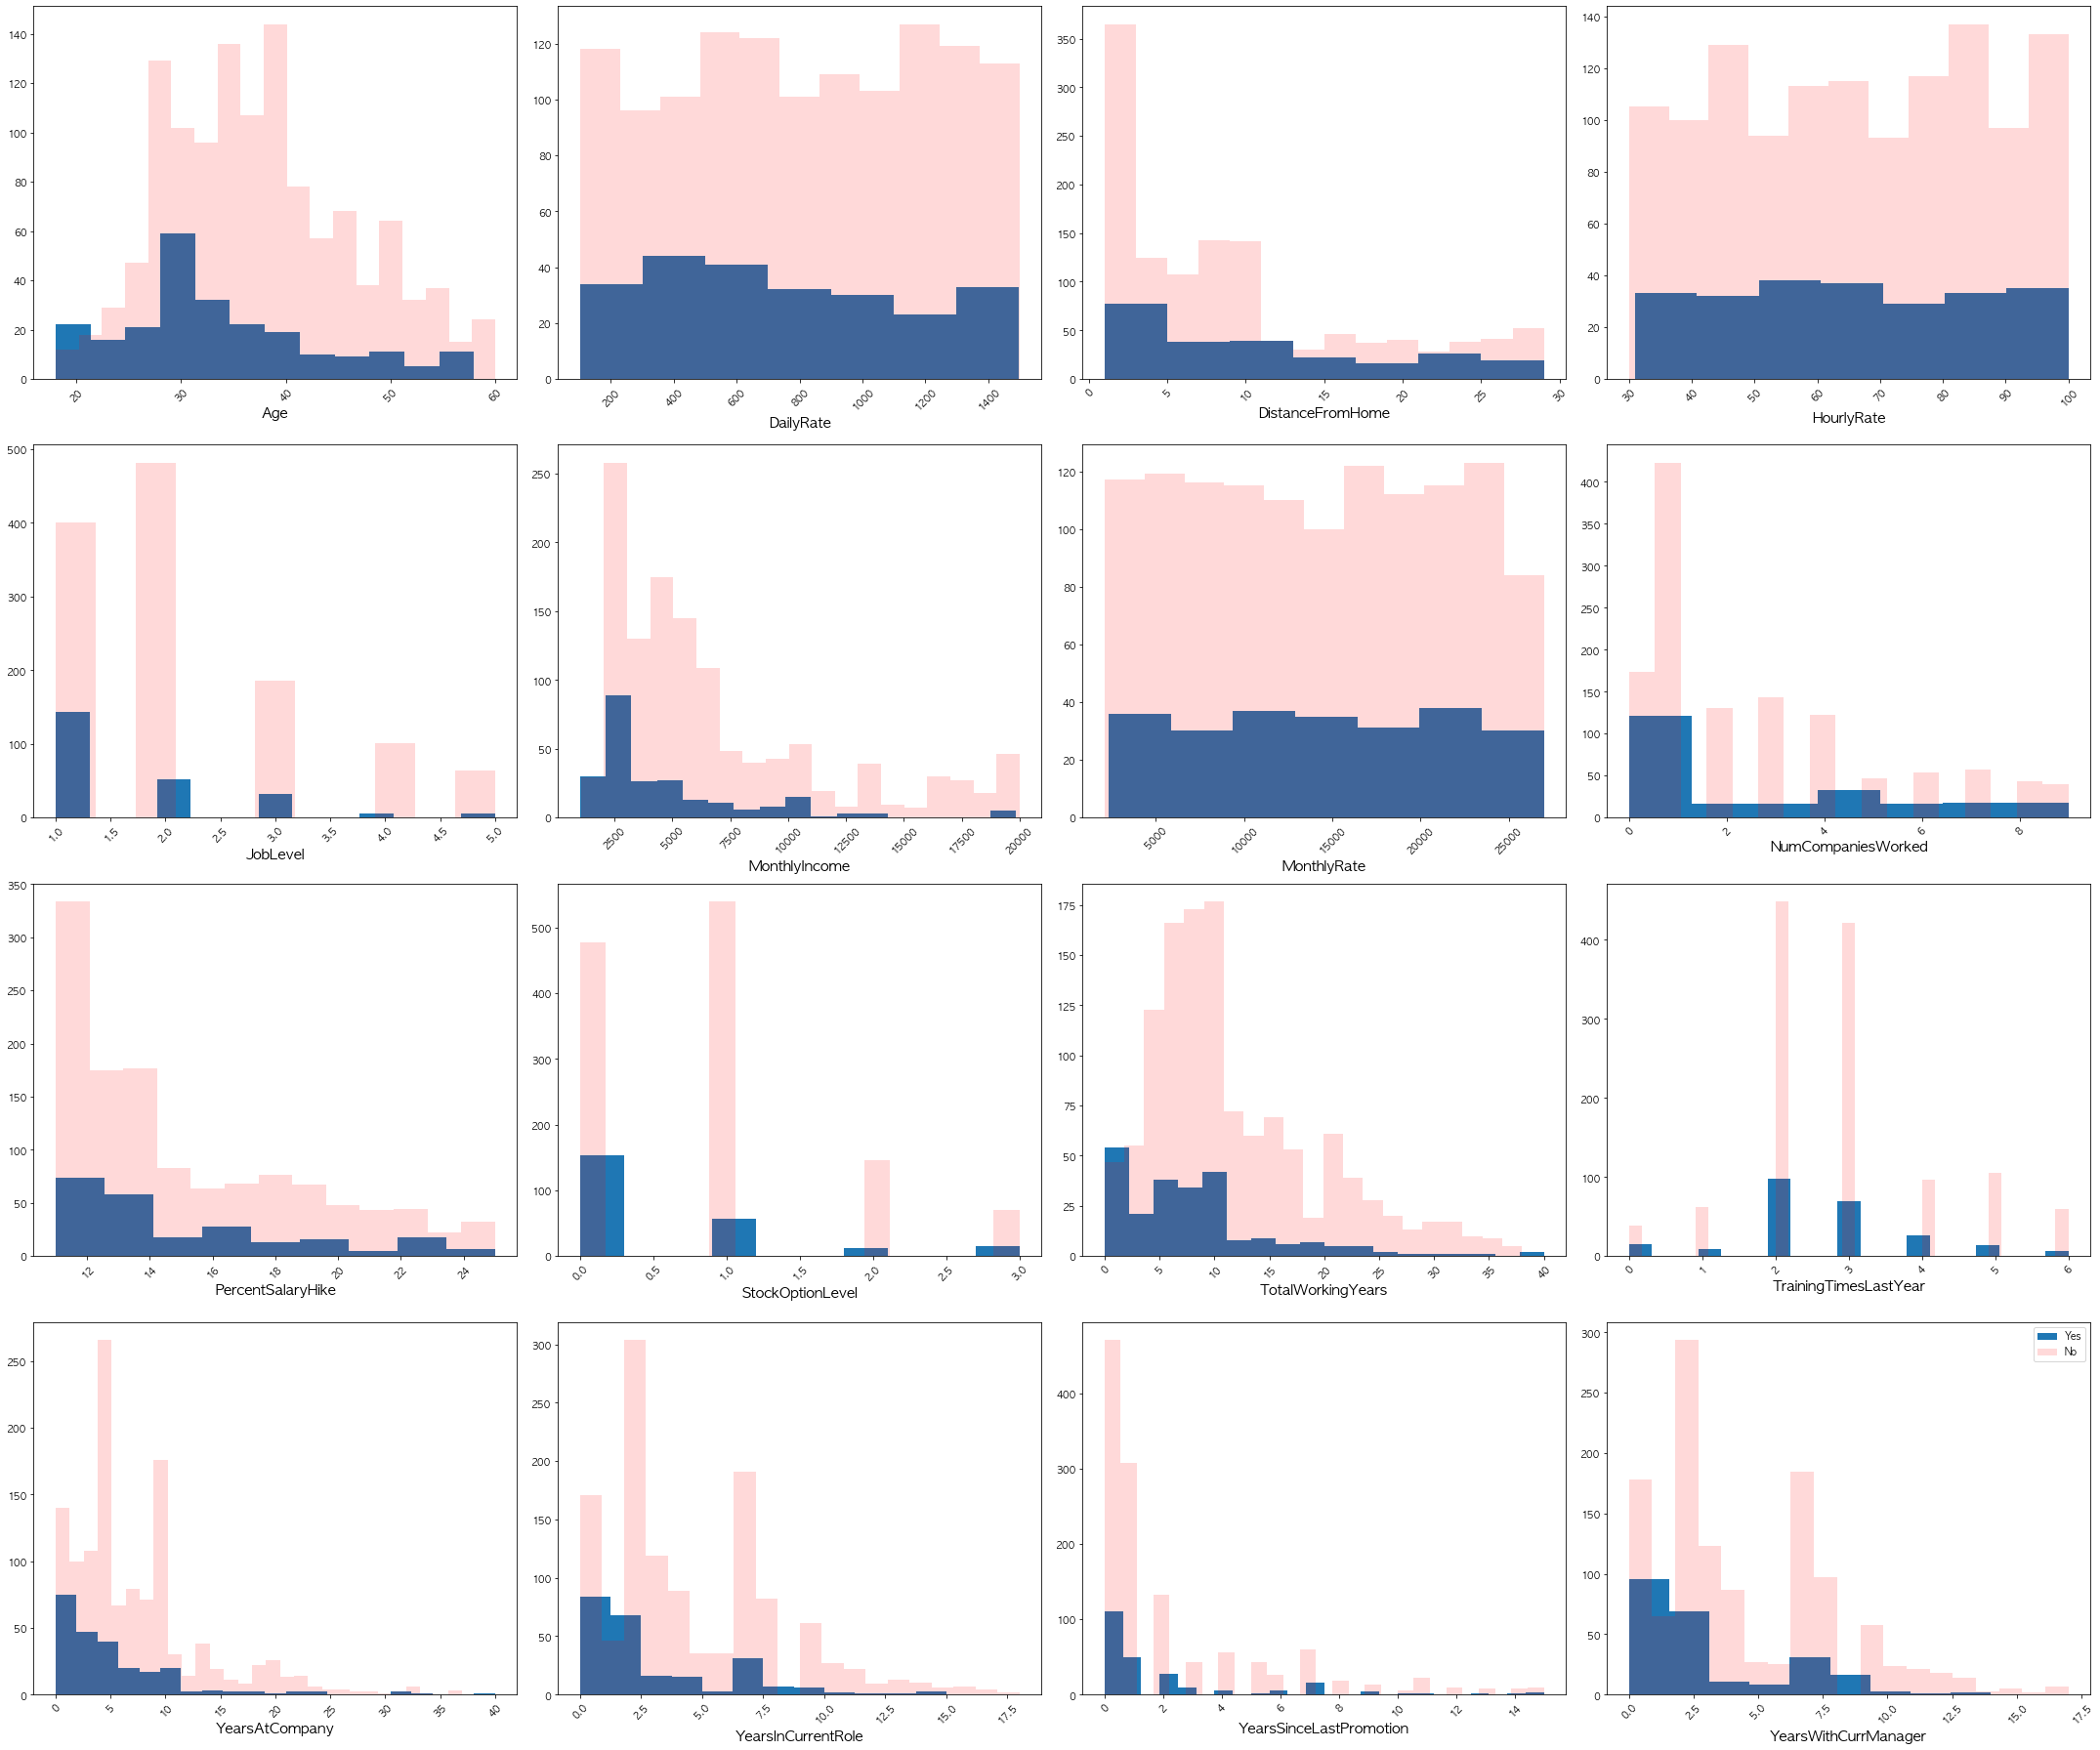

In [18]:
fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,4,l)
    sns.distplot(df[df['Attrition']=='Yes'][int_col[i]],kde=False,hist_kws=({'alpha':1}),label='Yes')
    sns.distplot(df[df['Attrition']=='No'][int_col[i]],kde=False,hist_kws=({'color':'red','alpha':0.15}),label='No')
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 16:
        break
    l += 1
fig.tight_layout()
plt.legend()
plt.show()

In [19]:
# 가설

출장 빈도
부서별
월소득이 낮으면 퇴사, 연봉인상율, 스톡옵션, 마지막 프로모션
업무환경, 업무만족도가 낮으면 퇴사
업무참여도
업무종류
워라밸이 낮으면 퇴사
결혼 여부에 따른 퇴사
근속 연수에 따른 퇴사
업무 종류, 수준에 따른 퇴사
경력 기간, 근속 연수, 현재 역할의 년수

경력 기간과 근속 연수가 왜 다를까? -> 다녔던 회사의 수가 문제일까?
# object 형식은 ratio_graph
# int 형식은 boxplot

# 이상치 제거 전에 가설 검증부터 해야된다
# 이상치 제거 전에 상관계수로 어떤 변수들이 상관이 있나 봐야한다

SyntaxError: invalid syntax (1717778124.py, line 3)

In [43]:
# 일한 회사가 0개인데 경력기간과 근속연수가 같은 사람은 없다 -> 0개가 첫회사면 경력기간과 근속연수가 같아야한다.
len(df[(df['NumCompaniesWorked']==0) & (df['TotalWorkingYears'] == df['YearsAtCompany'])])

0

In [47]:
# 일한 회사가 1개인데 경력기간과 근속연수가 같은 사람은 474명 -> 0개가 첫회사라면 이사람들은 회사가 2개니까 경력기간과 근속연수가 같으면 안된다.
len(df[(df['NumCompaniesWorked']==1) & (df['TotalWorkingYears'] == df['YearsAtCompany'])])

474

In [44]:
# 일한 회사가 0개면서 경력기간과 근속연수가 다른 사람은 197명 -> ??? 0개가 오류?
len(df[(df['NumCompaniesWorked']==0) & (df['TotalWorkingYears'] != df['YearsAtCompany'])])

197

In [46]:
# 일한 회사가 1개면서 경력기간과 근속연수가 다른 사람은 197명 -> 근속연수가 1년이 되지 않았지만 햇수로 입사한지 1년이 넘은 사람들
len(df[(df['NumCompaniesWorked']==1) & (df['TotalWorkingYears'] != df['YearsAtCompany'])])

47

In [34]:
# 경력기간과 근속연수가 같은 사람의 일한 회사 수는 1개 -> 첫 회사가 IBM
print(df[df['TotalWorkingYears'] == df['YearsAtCompany']]['NumCompaniesWorked'])
print(len(df[df['TotalWorkingYears'] == df['YearsAtCompany']]['NumCompaniesWorked'] == 1))

# 일한회사가 0개를 1개로 늘려주면 딱?

1       1
3       1
7       1
12      1
15      1
       ..
1451    1
1456    1
1458    1
1460    1
1467    1
Name: NumCompaniesWorked, Length: 474, dtype: int64
474


In [ ]:
# # 출장빈도에 따라서 퇴직

# # 컬럼에 대한 퇴직자 비율
# def ratio_attrition_yes(col):
    
#     a = df[df['Attrition']=='Yes'].groupby(df[col]).size()
    
#     ratio = []
#     for i in range(len(a)):
#         temp = a[i]/len(df[df['Attrition']=='Yes'])
#         ratio.append(temp)
    
#     return ratio

# # 컬럼에 대한 미퇴직자 비율
# def ratio_attrition_no(col):
    
#     b = df[df['Attrition']=='No'].groupby(df[col]).size()
    
#     ratio = []
#     for i in range(len(b)):
#         temp = b[i]/len(df[df['Attrition']=='No'])
#         ratio.append(temp)
    
#     return ratio



def ratio_graph(col):
    
    def ratio_attrition_yes(col):
    
        a = df[df['Attrition']=='Yes'].groupby(df[col]).size()

        ratio = []
        for i in range(len(a)):
            temp = a[i]/len(df[df['Attrition']=='Yes'])
            ratio.append(temp)

        return ratio

    # 컬럼에 대한 미퇴직자 비율
    def ratio_attrition_no(col):
    
        b = df[df['Attrition']=='No'].groupby(df[col]).size()

        ratio = []
        for i in range(len(b)):
            temp = b[i]/len(df[df['Attrition']=='No'])
            ratio.append(temp)

        return ratio
    
    colors = sns.color_palette('Blues',len(df[col].unique()))
    
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.bar(df[df['Attrition']=='Yes'].groupby(df[col]).size().index,ratio_attrition_yes(col),color=colors)
    ax1.set_title('Attrition Yes',fontsize=12)
    ax2.bar(df[df['Attrition']=='No'].groupby(df[col]).size().index,ratio_attrition_no(col),color=colors)
    ax2.set_title('Attrition No',fontsize=12)
    # plt.show()
    
    for i, v in enumerate(df[df['Attrition']=='Yes'].groupby(df[col]).size().index):
        ax1.text(v,ratio_attrition_yes(col)[i],round(ratio_attrition_yes(col)[i]*100,1),
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
        
    for i, v in enumerate(df[df['Attrition']=='No'].groupby(df[col]).size().index):
        ax2.text(v,ratio_attrition_no(col)[i],round(ratio_attrition_no(col)[i]*100,1),
                 fontsize = 10,
                 color = 'black',
                 horizontalalignment='center',
                 verticalalignment='bottom')
    plt.show()

In [ ]:
ratio_graph('BusinessTravel')

In [ ]:
sns.boxplot('Attrition','MonthlyIncome',data=df)
plt.show()

In [ ]:
object_col

In [ ]:
ratio_graph('Department')

In [ ]:
sns.boxplot('Attrition','PercentSalaryHike',data=df)
plt.show()
# 연봉 인상율은 크게 관련이 없다

In [ ]:
# sns.boxplot('Attrition','EnvironmentSatisfaction',data=df)
# plt.show()

In [ ]:
fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,4,l)
    sns.boxplot(y=df[int_col[i]],x=df['Attrition'])
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 16:
        break
    l += 1
fig.tight_layout()
plt.show()

In [ ]:
len(int_col)

In [ ]:
fig = plt.figure(figsize=(30,25))

l = 1
for i in range(len(int_col)):

    plt.subplot(4,4,l)
    sns.boxplot(df[int_col[i]])
    plt.xticks(rotation=45)
    plt.xlabel(int_col[i],fontsize=15)
    if l > 16:
        break
    l += 1
fig.tight_layout()
plt.show()

In [ ]:
# MonthlyIncome, NumCompaniesWorked, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear,
# YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [ ]:
# MonthlyIncome 이상치

q1 = np.percentile(df['MonthlyIncome'],25)
q3 = np.percentile(df['MonthlyIncome'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

monthlyincome_outlier = df[(df['MonthlyIncome'] < lf) | (df['MonthlyIncome'] > uf)]

In [ ]:
# NumCompaniesWorked 이상치

q1 = np.percentile(df['NumCompaniesWorked'],25)
q3 = np.percentile(df['NumCompaniesWorked'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

numcompaniesworked_outlier = df[(df['NumCompaniesWorked'] < lf) | (df['NumCompaniesWorked'] > uf)]

In [ ]:
# StockOptionLevel 이상치

q1 = np.percentile(df['StockOptionLevel'],25)
q3 = np.percentile(df['StockOptionLevel'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

stockoptionlevel_outlier = df[(df['StockOptionLevel'] < lf) | (df['StockOptionLevel'] > uf)]

In [ ]:
# TotalWorkingYears 이상치

q1 = np.percentile(df['TotalWorkingYears'],25)
q3 = np.percentile(df['TotalWorkingYears'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

totalworkingyears_outlier = df[(df['TotalWorkingYears'] < lf) | (df['TotalWorkingYears'] > uf)]

In [ ]:
# TrainingTimesLastYear 이상치

q1 = np.percentile(df['TrainingTimesLastYear'],25)
q3 = np.percentile(df['TrainingTimesLastYear'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

trainingtimeslastyear_outlier = df[(df['TrainingTimesLastYear'] < lf) | (df['TrainingTimesLastYear'] > uf)]

In [ ]:
# YearsAtCompany 이상치

q1 = np.percentile(df['YearsAtCompany'],25)
q3 = np.percentile(df['YearsAtCompany'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

yearsatcompany_outlier = df[(df['YearsAtCompany'] < lf) | (df['YearsAtCompany'] > uf)]

In [ ]:
# YearsInCurrentRole 이상치

q1 = np.percentile(df['YearsInCurrentRole'],25)
q3 = np.percentile(df['YearsInCurrentRole'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

yearsincurrentrole_outlier = df[(df['YearsInCurrentRole'] < lf) | (df['YearsInCurrentRole'] > uf)]

In [ ]:
# YearsSinceLastPromotion 이상치

q1 = np.percentile(df['YearsSinceLastPromotion'],25)
q3 = np.percentile(df['YearsSinceLastPromotion'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

yearssincelastpromotion_outlier = df[(df['YearsSinceLastPromotion'] < lf) | (df['YearsSinceLastPromotion'] > uf)]

In [ ]:
# YearsWithCurrManager 이상치

q1 = np.percentile(df['YearsWithCurrManager'],25)
q3 = np.percentile(df['YearsWithCurrManager'],75)
iqr = q3 - q1
lf = q1 - 1.5*iqr
uf = q3 + 1.5*iqr

yearswithcurrmanager_outlier = df[(df['YearsWithCurrManager'] < lf) | (df['YearsWithCurrManager'] > uf)]

In [ ]:
outlier = pd.concat([monthlyincome_outlier,numcompaniesworked_outlier,stockoptionlevel_outlier,totalworkingyears_outlier,trainingtimeslastyear_outlier,yearsatcompany_outlier,yearsincurrentrole_outlier,yearssincelastpromotion_outlier,yearswithcurrmanager_outlier]).drop_duplicates()
df_new = df.drop(index=outlier.index)

In [ ]:
df_new

In [ ]:
df.corr(method='pearson')

In [ ]:
df[['BusinessTravel','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','MaritalStatus']].corr(method='pearson')

In [ ]:
df[['BusinessTravel','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','MaritalStatus']].corrwith(method='pearson')

In [ ]:
df[['BusinessTravel','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','MaritalStatus']]

df_dum = pd.get_dummies(df[['Attrition','BusinessTravel','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','MaritalStatus']])

In [ ]:
#df_dum.drop('Attrition_No',inplace=True,axis=1)
#df_dum
df_dum.drop('Attrition_Yes',axis=1).corrwith(df_dum['Attrition_Yes'])

In [ ]:
df_dum_corr = df_dum.corr(method='pearson')

In [ ]:
fig = plt.figure(figsize=(30,25))
ax = sns.heatmap(df_dum_corr, annot=True, annot_kws=dict(color='white'), cmap='Greys')
plt.show()

In [ ]:
df_dum.corrwith(df_dum['Attrition_Yes'])

In [ ]:
plt.barh(df_dum.drop('Attrition_Yes',axis=1).corrwith(df_dum['Attrition_Yes']).index,sorted(df_dum.drop('Attrition_Yes',axis=1).corrwith(df_dum['Attrition_Yes']).value_counts().index))

In [ ]:
df_dum.corrwith(df_dum['Attrition_Yes']).value_counts().index

In [ ]:
dfdf = pd.get_dummies(df)
dfdf

In [ ]:
dfdf.drop('Attrition_No',inplace=True,axis=1)

In [ ]:
fig = plt.figure(figsize=(8,20))
plt.barh(dfdf.drop('Attrition_Yes',axis=1).corrwith(dfdf['Attrition_Yes']).index,dfdf.drop('Attrition_Yes',axis=1).corrwith(dfdf['Attrition_Yes']).value_counts().index)

In [ ]:
dd = pd.get_dummies(df)

In [ ]:
dd_new = dd.drop('Attrition_No',axis=1)

In [ ]:
dd_new

In [ ]:
object_col